In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv(r"C:\Users\Kush\Desktop\Selected dataset for ML and DL\ML-EdgeIIoT-dataset.csv", low_memory= False)

In [3]:
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [4]:
from sklearn.utils import shuffle
import pandas as pd

df= pd.read_csv(r"C:\Users\Kush\Desktop\Selected dataset for ML and DL\ML-EdgeIIoT-dataset.csv", low_memory= False)

drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())
print(df['Attack_label'].value_counts())

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64
1    128095
0     24101
Name: Attack_label, dtype: int64


In [5]:
drop_columns = ["http.request.method", "http.referer", "http.request.version", "dns.qry.name.len", "mqtt.conack.flags","mqtt.protoname", "mqtt.topic"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()


arp.opcode                   0
arp.hw.size                  0
icmp.checksum                0
icmp.seq_le                  0
icmp.unused                  0
http.content_length          0
http.response                0
http.tls_port                0
tcp.ack                      0
tcp.ack_raw                  0
tcp.checksum                 0
tcp.connection.fin           0
tcp.connection.rst           0
tcp.connection.syn           0
tcp.connection.synack        0
tcp.flags                    0
tcp.flags.ack                0
tcp.len                      0
tcp.seq                      0
udp.stream                   0
udp.time_delta               0
dns.qry.name                 0
dns.qry.qu                   0
dns.qry.type                 0
dns.retransmission           0
dns.retransmit_request       0
dns.retransmit_request_in    0
mqtt.conflag.cleansess       0
mqtt.conflags                0
mqtt.hdrflags                0
mqtt.len                     0
mqtt.msg_decoded_as          0
mqtt.msg

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152196 entries, 88971 to 35413
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   arp.opcode                 152196 non-null  float64
 1   arp.hw.size                152196 non-null  float64
 2   icmp.checksum              152196 non-null  float64
 3   icmp.seq_le                152196 non-null  float64
 4   icmp.unused                152196 non-null  float64
 5   http.content_length        152196 non-null  float64
 6   http.response              152196 non-null  float64
 7   http.tls_port              152196 non-null  float64
 8   tcp.ack                    152196 non-null  float64
 9   tcp.ack_raw                152196 non-null  float64
 10  tcp.checksum               152196 non-null  float64
 11  tcp.connection.fin         152196 non-null  float64
 12  tcp.connection.rst         152196 non-null  float64
 13  tcp.connection.syn        

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Independent features
x= df.iloc[:,:-1]
y= df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
#params = {
 #   'objective': ['binary:logistic'],
  #  'max_depth': [1,2,3,4,5],
   # 'learning_rate': [0.01,0.1,1.0]
#}

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
# To convert string to float as having error is "ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14], got ['Backdoor' 'DDoS_HTTP' 'DDoS_ICMP' 'DDoS_TCP' 'DDoS_UDP' 'Fingerprinting'
# 'MITM' 'Normal' 'Password' 'Port_Scanning' 'Ransomware' 'SQL_injection'
# 'Uploading' 'Vulnerability_scanner' 'XSS']"

In [38]:
model= XGBClassifier()
model.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [40]:
y_pred = model.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix

In [48]:
y_pred_decoded = le.inverse_transform(y_pred)
score= accuracy_score(y_test, y_pred_decoded)

In [59]:
score

0.9099868593955321

In [50]:
classification_report(y_test, y_pred_decoded)

'                       precision    recall  f1-score   support\n\n             Backdoor       1.00      0.93      0.96      1993\n            DDoS_HTTP       0.62      0.89      0.73      2076\n            DDoS_ICMP       1.00      1.00      1.00      2673\n             DDoS_TCP       1.00      1.00      1.00      2012\n             DDoS_UDP       1.00      1.00      1.00      2805\n       Fingerprinting       1.00      0.66      0.80       159\n                 MITM       1.00      1.00      1.00        66\n               Normal       1.00      1.00      1.00      4879\n             Password       0.80      0.79      0.80      2018\n        Port_Scanning       0.87      1.00      0.93      1723\n           Ransomware       0.99      0.88      0.93      1945\n        SQL_injection       0.75      0.77      0.76      2019\n            Uploading       0.84      0.64      0.73      2036\nVulnerability_scanner       0.99      0.96      0.98      2053\n                  XSS       0.90     

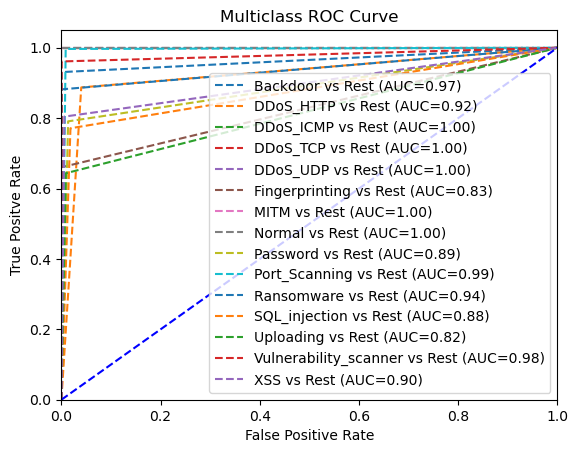

In [60]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt  

y_test_binarize= label_binarize(y_test, classes= np.unique(y_test))
y_pred_binarize= label_binarize(y_pred, classes= np.unique(y_pred))

#ROC Curve
fpr= {}
tpr= {}
thresh= {}
roc_auc= dict()

n_class= classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarize[:,i], y_pred_binarize[:,i])
    roc_auc[i]= auc(fpr[i], tpr[i])
    
    #plotting
    plt.plot(fpr[i], tpr[i], linestyle= '--', label= '%s vs Rest (AUC=%0.2f)'% (classes[i], roc_auc[i]))
    
plt.plot([0,1], [0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.legend(loc= 'lower right')
plt.show()

In [53]:
confusion_matrix(y_test, y_pred_decoded)

array([[1855,   71,    0,    0,    0,    0,    0,    0,    1,   26,    2,
           1,   36,    1,    0],
       [   0, 1842,    0,    0,    0,    0,    0,    0,   32,    0,    0,
         122,   52,    4,   24],
       [   0,    0, 2673,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0, 2012,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0, 2805,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,   25,    0,    0,    0,  105,    0,    0,    0,   26,    0,
           0,    3,    0,    0],
       [   0,    0,    0,    0,    0,    0,   66,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4879,    0,    0,    0,
           0,    0,    0,    0],
       [   0,  188,    0,    0,    0,    0,    0,    0, 1596,    0,    0,
         164,   29,    0,   41],
       [   1,    0,    0,    0,    0,